<a href="https://colab.research.google.com/github/sheikh-bah/Deep_NN_-_CNN/blob/main/inception_V3%2BCat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import all necessary files
import os
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow import keras


In [25]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-03-08 11:08:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.210.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   123MB/s    in 0.7s    

2021-03-08 11:08:57 (123 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [40]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [27]:
# import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inception_model = InceptionV3(input_shape = (150, 150, 3),
                              include_top = False,
                              weights = None)


# load the weight of the inception
inception_model.load_weights(inception_weights)

# not to trained the layers in the model
for layer in inception_model.layers:
  layer.trainable = False


# show the output of the inception model
inception_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [28]:
# we want to get the last  output of the model to use as an input to our model

last_output = inception_model.get_layer('mixed7')
print('Last layer output is : ', last_output.output_shape)
last_layer = last_output.output


Last layer output is :  (None, 7, 7, 768)


# Build the model


In [29]:
# flatten the last_layer to one dimension

x = layers.Flatten()(last_layer)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)

In [30]:
# compile the model
model = Model(inception_model.input,x)

In [31]:
from tensorflow.keras.optimizers import RMSprop

In [32]:
model.compile(optimizer= RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics= ['accuracy'])

In [33]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 


--2021-03-08 11:09:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.213.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   168MB/s    in 0.9s    

2021-03-08 11:09:11 (168 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-03-08 11:09:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.210.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [34]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref =zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()



In [35]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

In [36]:

horse_train_dir = os.path.join('/tmp/training/horses') # Directory with our training cats picture
human_train_dir = os.path.join('/tmp/training/humans') # Directory with our training dogs picture




horse_validation_dir = os.path.join('/tmp/validation/horses') # Directory with our validation cats picture
human_validation_dir = os.path.join('/tmp/validation/humans') # Directory with our validation dogs picture

In [37]:
train_horse_fnames = print('The number of training horses: ',len(os.listdir(horse_train_dir)))
train_human_fnames = print('The number of training humans: ', len(os.listdir(human_train_dir)))
validation_horse_fnames = print('The number of validation horses: ', len(os.listdir(horse_validation_dir)))
validation_human_fnames = print('The number of validation humans: ', len(os.listdir(human_validation_dir)))

The number of training horses:  500
The number of training humans:  527
The number of validation horses:  128
The number of validation humans:  128


# Image preprocessing

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
                      rescale = 1/255,
                      horizontal_flip = True,
                      width_shift_range = 0.2,
                      height_shift_range = 0.2,
                      zoom_range = 0.2,
                      shear_range = 0.2,
                      rotation_range = 40 )

validation_datagen = ImageDataGenerator(rescale = 1/255)


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory( 
                          train_dir,
                          target_size = (150, 150),
                          batch_size = 20,
                          class_mode = 'binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                            validation_dir,
                            target_size = (150, 150),
                            batch_size = 20,
                            class_mode = 'binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [41]:
callbacks = myCallback()
history = model.fit( train_generator,
      steps_per_epoch=50,  
      epochs=100,
     validation_data = validation_generator,
      validation_steps= 12,  verbose=1, callbacks = [callbacks])

Epoch 1/100
50/50 [==============================] - 68s 1s/step - loss: 0.0763 - accuracy: 0.9828 - val_loss: 4.5045e-04 - val_accuracy: 1.0000
Epoch 2/100
50/50 [==============================] - 68s 1s/step - loss: 0.0924 - accuracy: 0.9838 - val_loss: 0.1186 - val_accuracy: 0.9750
Epoch 3/100
50/50 [==============================] - 68s 1s/step - loss: 0.1052 - accuracy: 0.9797 - val_loss: 0.1384 - val_accuracy: 0.9667
Epoch 4/100
50/50 [==============================] - 68s 1s/step - loss: 0.0385 - accuracy: 0.9939 - val_loss: 1.8126e-06 - val_accuracy: 1.0000
Epoch 5/100
50/50 [==============================] - 68s 1s/step - loss: 0.1792 - accuracy: 0.9706 - val_loss: 0.2720 - val_accuracy: 0.9792
Epoch 6/100
50/50 [==============================] - 68s 1s/step - loss: 0.0507 - accuracy: 0.9889 - val_loss: 0.3829 - val_accuracy: 0.9625
Epoch 7/100
50/50 [==============================] - 68s 1s/step - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.1323 - val_accuracy: 0.9750
Epoch

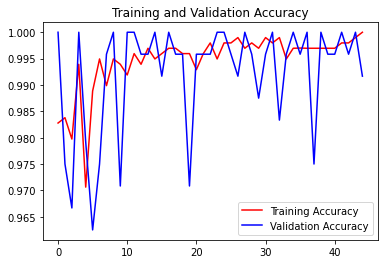

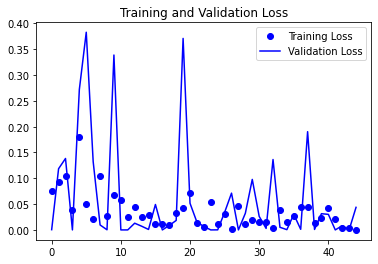

In [44]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()



plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()